## Directing App Users to Paid Subscriptions 


In this project, the target audience is the users that have downloaded the free app and the goal is to predict which users are not likely to subscribe to the premium subscription.

Since these users have already taken the first step and downloaded the app it makes sense to focus your marketing efforts on converting them.

Also, by identifying the users who are likely to convert to the premium version anyways it makes sense to not spend your marketing efforts on them.



In [1]:
#importing important lib

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from datetime import datetime
from sklearn import metrics

In [2]:
# importing app data
df_main = pd.read_csv("P39-CS3-Data/appdata10.csv")
print("Shape : ", df_main.shape)
df_main.head()

Shape :  (50000, 12)


,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [3]:
# importing top screen csv
df_top_screen = pd.read_csv("P39-CS3-Data/top_screens.csv")
df_top_screen.head()

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone


In [4]:
# coverting hour column to int datatype
df_main["hour"] = df_main["hour"].str[0:3].astype(int)

### Ploting distribution for each numerical columns

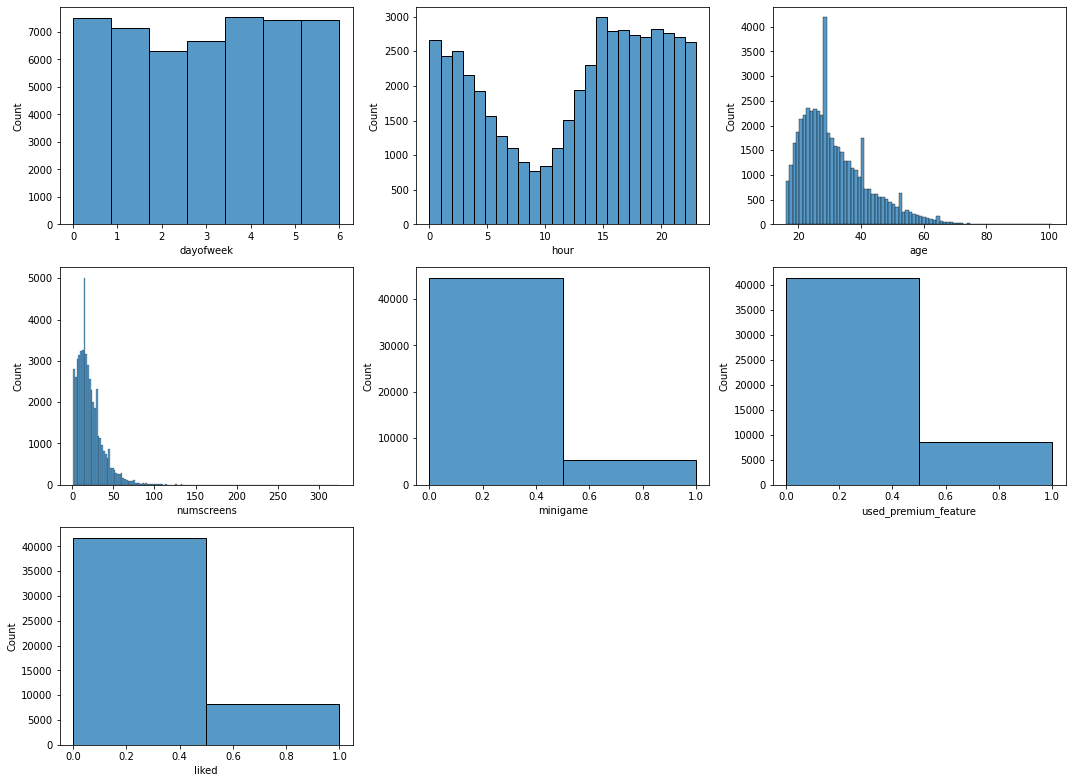

In [5]:
numeric_cols = ['dayofweek', 'hour', 'age','numscreens', 'minigame', 'used_premium_feature','liked']

plt.figure(figsize=(15, 25))

for i in range(0, len(numeric_cols)):
     plt.subplot(7, 3, i+1)
     sns.histplot(x=df_main[numeric_cols[i]],bins = df_main[numeric_cols[i]].nunique())
     #plt.hist(x=df_main[numeric_cols[i]],bins = df_main[numeric_cols[i]].nunique())
     plt.xlabel(numeric_cols[i])
     plt.tight_layout()

#### Correlation of each numerical columns w.r.t target variable

<AxesSubplot:title={'center':'correlation with target variable'}>

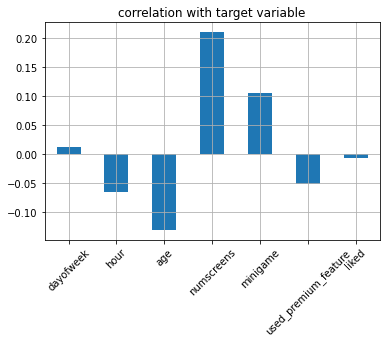

In [6]:
df_main[numeric_cols].corrwith(df_main.enrolled).plot(kind = "bar", rot ="45", 
                                                      grid = True, title = "correlation with target variable")

### Observations from plots

In [7]:
# dayofweek - Each weekday showing equal distribution hence no perticular weekday showing dominance on output
# hour - between 5 to 12 there is less users active on the application and slightly negative correlation with target variable 
# age - most of users are from  20 to 35 age category and age slowing negative correlation 
#        with targets means older people are less likely to enroll in application
# numscreen - number of screen uses are between 0 to 40 counts and showing strong correlation with target varible
# most of users are not playing minigates, not using premium features and not liking the features 

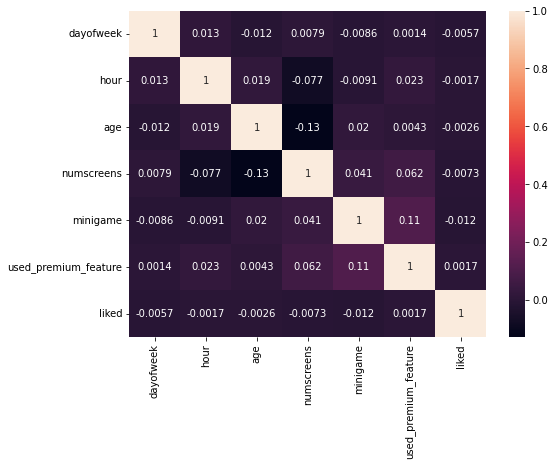

In [8]:
# checking corretion beetween features
fig = plt.figure(figsize = (8,6))
sns.heatmap(df_main[numeric_cols].corr(),annot = True)
plt.show()


In [9]:
# there no direct correlation between any two features

### Data preprocessing and feature Engineering

In [10]:
# calculating time in hours between first open and enrolled date 
df_main["first_open"]    = pd.to_datetime(df_main["first_open"])
df_main["enrolled_date"] = pd.to_datetime(df_main["enrolled_date"])
df_main["difference"]    = df_main["enrolled_date"] - df_main["first_open"]
df_main["difference"] = df_main["difference"].apply(lambda x :x/pd.Timedelta("1 h")) 

<AxesSubplot:ylabel='Frequency'>

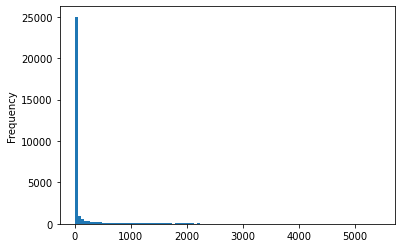

In [11]:
# plotting frequency distribution of difference column
df_main.difference.dropna().plot(kind = "hist",bins = 100)

<AxesSubplot:ylabel='Frequency'>

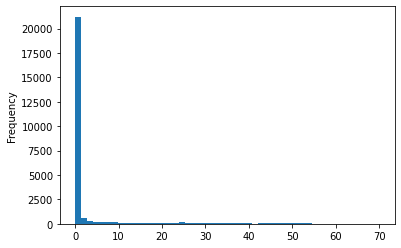

In [12]:
## ploting it for range 0 - 70 
df_main.difference.dropna().plot(kind = "hist",bins = 50, range = (0,70))

In [13]:
# from differance plot - most of users enrolled in withing 10hrs. 
# hence here we decided 48hr as cutoff point for enrolled
df_main.loc[df_main.difference > 48,"enrolled"] = 0

In [14]:
# droping unnecessary 
df_final = df_main.drop(["first_open","difference","enrolled_date"],axis  = 1)

In [15]:
## company has provided important features in top_screen data 
## here we are generating new features using screen list column and top screen data

In [16]:
# string in first cell of screen_list
df_final.screen_list[0]

'idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login'

In [17]:
# Making top_screens list from top_screens dataframe
top_screens = [screen+"," for screen in df_top_screen.top_screens.to_list()]
top_screens.sort()
print(top_screens)

['AccountView,', 'Alerts,', 'BankVerification,', 'CC1,', 'CC1Category,', 'CC3,', 'Credit1,', 'Credit2,', 'Credit3,', 'Credit3Container,', 'Credit3Dashboard,', 'Cycle,', 'EditProfile,', 'Finances,', 'Institutions,', 'Leaderboard,', 'ListPicker,', 'Loan,', 'Loan2,', 'Loan3,', 'Loan4,', 'Login,', 'NetworkFailure,', 'ProfileChildren ,', 'ProfileEducation,', 'ProfileEducationMajor,', 'ProfileEmploymentLength,', 'ProfileJobTitle,', 'ProfileMaritalStatus,', 'ProfilePage,', 'ResendToken,', 'RewardDetail,', 'Rewards,', 'RewardsContainer,', 'Saving1,', 'Saving10,', 'Saving2,', 'Saving2Amount,', 'Saving4,', 'Saving5,', 'Saving6,', 'Saving7,', 'Saving8,', 'Saving9,', 'SecurityModal,', 'Splash,', 'TransactionList,', 'VerifyAnnualIncome,', 'VerifyCountry,', 'VerifyDateOfBirth,', 'VerifyHousing,', 'VerifyHousingAmount,', 'VerifyIncomeType,', 'VerifyMobile,', 'VerifyPhone,', 'WebView,', 'idscreen,', 'location,']


In [18]:
# generating features to df_final 
for screen in top_screens:
    sc = screen.replace(",","")
    df_final[sc] = 0
    df_final[sc] = df_final["screen_list"].apply(lambda s : 1 if screen in str(s) else 0)

In [19]:
# summing  simillary features 
related_dict = {
                    "creadit_card_count" :   ['CC1', 'CC1Category', 'CC3'],
                    "creadit_count"      :   ['Credit1', 'Credit2', 'Credit3', 'Credit3Container', 'Credit3Dashboard'],
                    "loan_count"         :   ['Loan', 'Loan2', 'Loan3', 'Loan4'],
                    "saving_count"       :   ['Saving1', 'Saving10', 'Saving2', 'Saving2Amount', 'Saving4', 'Saving5', 
                                             'Saving6', 'Saving7', 'Saving8', 'Saving9']
                }
    
for key in related_dict.keys(): 
    df_final[key] = df_final[related_dict.get(key)].sum(axis=1)
    df_final.drop(related_dict.get(key),axis = 1, inplace = True)

### splitting the data for training and testing 

In [20]:
## importing required lib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# separating the data 
X = df_final.drop(["user","enrolled","screen_list"], axis = 1)
y = df_final["enrolled"]

# scalling 
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# spliting 
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state = 15)


### Model development 

In [21]:
# model preparation 
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# Training the model
clf.fit(X_train,y_train)

# prediction
y_pred = clf.predict(X_test)

### Model evaluation

In [22]:
print("Test accuray score  :  ", metrics.accuracy_score(y_test,y_pred))
print("Train accuray score :  ", clf.score(X_train,y_train))
print("F1 score            :  ", metrics.f1_score(y_test,y_pred))

Test accuray score  :   0.7519
Train accuray score :   0.75785
F1 score            :   0.7539910758552305


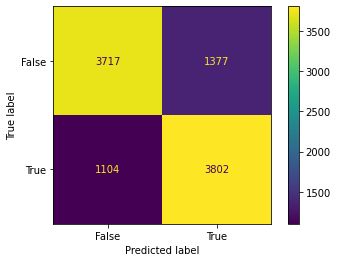

In [23]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [30]:
print('roc_auc_score for Logistic Regression: ', metrics.roc_auc_score(y_test, y_pred))

roc_auc_score for Logistic Regression:  0.7523257019961136
